# Extract files

In [1]:
import os
from zipfile import ZipFile

def unzip_all_files_in_dir(data_path='data/'):
    last_files_zip = []
    while True:
        files_zip = [file for file in os.listdir(data_path) if file.endswith('.zip')]
        if files_zip == last_files_zip:
            break
        else:
            files_new = list(set(files_zip) - set(last_files_zip))
            last_files_zip = files_zip
        for file in files_new:
            ZipFile(data_path+file,'r').extractall(data_path)

# Load data

In [2]:
import pandas as pd

train = pd.read_csv('data/train.csv', encoding="ISO-8859-1")
display(train.head(5))
display(train.describe())

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


,id,product_uid,relevance
count,74067.000000,74067.000000,74067.000000
mean,112385.709223,142331.911553,2.381634
std,64016.573650,30770.774864,0.533984
min,2.000000,100001.000000,1.000000
25%,57163.500000,115128.500000,2.000000
50%,113228.000000,137334.000000,2.330000
75%,168275.500000,166883.500000,3.000000
max,221473.000000,206650.000000,3.000000


In [3]:
attributes = pd.read_csv('data/attributes.csv')
attributes['product_uid'] = attributes['product_uid'].fillna(0).astype('int')
display(attributes.head(5))
product_descriptions = pd.read_csv('data/product_descriptions.csv')
display(product_descriptions.head(5))

,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90° connection...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


# Exploring data

### Check null values

In [4]:
print('Total entries: ', len(train))
display(train.isnull().sum())
display(train.nunique())

Total entries:  74067


id               0
product_uid      0
product_title    0
search_term      0
relevance        0
dtype: int64

id               74067
product_uid      54667
product_title    53489
search_term      11795
relevance           13
dtype: int64

### Check if product_uid is unique

In [5]:
print(product_descriptions['product_uid'].is_unique)
print(attributes['product_uid'].is_unique)

True
False


### Before joining the attributes, I need to check why are product_uid not unique

In [6]:
attributes[attributes['product_uid'] == 100001]

,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90° connection...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel
5,100001,Bullet06,Galvanized for extra corrosion resistance
6,100001,Bullet07,Install with 10d common nails or #9 x 1-1/2 in...
7,100001,Gauge,12
8,100001,Material,Galvanized Steel
9,100001,MFG Brand Name,Simpson Strong-Tie


In [7]:
attributes['name'].nunique()

5410

### I select only the attributes with more than 10.000 entries

In [8]:
df_showing_all_att = attributes['name'].value_counts().rename_axis('name').reset_index(name='counts')
list_showing_all_att = df_showing_all_att[df_showing_all_att['counts'] > 10000].values.tolist()
attributes_selected = [name[0] for name in list_showing_all_att]
print(attributes_selected)

for attribute in attributes_selected:
    attributes.loc[attributes['name'] == attribute, attribute] = attributes['value']

pd.set_option('display.max_columns', None)
display(attributes.head(5))

['MFG Brand Name', 'Bullet02', 'Bullet03', 'Bullet04', 'Bullet01', 'Product Width (in.)', 'Bullet05', 'Product Height (in.)', 'Product Depth (in.)', 'Product Weight (lb.)', 'Bullet06', 'Color Family', 'Bullet07', 'Material', 'Color/Finish', 'Bullet08', 'Certifications and Listings', 'Bullet09', 'Assembled Height (in.)', 'Assembled Width (in.)', 'Assembled Depth (in.)', 'Product Length (in.)', 'Bullet10', 'Indoor/Outdoor', 'Bullet11']


,product_uid,name,value,MFG Brand Name,Bullet02,Bullet03,Bullet04,Bullet01,Product Width (in.),Bullet05,Product Height (in.),Product Depth (in.),Product Weight (lb.),Bullet06,Color Family,Bullet07,Material,Color/Finish,Bullet08,Certifications and Listings,Bullet09,Assembled Height (in.),Assembled Width (in.),Assembled Depth (in.),Product Length (in.),Bullet10,Indoor/Outdoor,Bullet11
0,100001,Bullet01,Versatile connector for various 90° connection...,NaN,NaN,NaN,NaN,Versatile connector for various 90° connection...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...,NaN,Stronger than angled nailing or screw fastenin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100001,Bullet03,Help ensure joints are consistently straight a...,NaN,NaN,Help ensure joints are consistently straight a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.,NaN,NaN,NaN,Dimensions: 3 in. x 3 in. x 1-1/2 in.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100001,Bullet05,Made from 12-Gauge steel,NaN,NaN,NaN,NaN,NaN,NaN,Made from 12-Gauge steel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
attributes.drop(['name','value'], axis=1, inplace=True)

In [10]:
attributes = attributes.fillna('').groupby('product_uid').agg(lambda x: ''.join(x))
attributes.head(3)

,MFG Brand Name,Bullet02,Bullet03,Bullet04,Bullet01,Product Width (in.),Bullet05,Product Height (in.),Product Depth (in.),Product Weight (lb.),Bullet06,Color Family,Bullet07,Material,Color/Finish,Bullet08,Certifications and Listings,Bullet09,Assembled Height (in.),Assembled Width (in.),Assembled Depth (in.),Product Length (in.),Bullet10,Indoor/Outdoor,Bullet11
product_uid,,,,,,,,,,,,,,,,,,,,,,,,,
0,,,,,,,,,,,,,,,,,,,,,,,,,
100001,Simpson Strong-Tie,Stronger than angled nailing or screw fastenin...,Help ensure joints are consistently straight a...,Dimensions: 3 in. x 3 in. x 1-1/2 in.,Versatile connector for various 90° connection...,3,Made from 12-Gauge steel,3,1.5,0.26,Galvanized for extra corrosion resistance,,Install with 10d common nails or #9 x 1-1/2 in...,Galvanized Steel,,,,,,,,,,,
100002,BEHR Premium Textured DeckOver,100% acrylic solid color coating,Resists cracking and peeling and conceals spli...,"Provides a durable, mildew resistant finish","Revives wood and composite decks, railings, po...",,Covers up to 75 sq. ft. in 2 coats per gallon,,,,"Creates a textured, slip-resistant finish",Browns / Tans,"For best results, prepare with the appropriate...",,Tugboat,Actual paint colors may vary from on-screen an...,,,7.76 in,6.63 in,6.63 in,,Colors available to be tinted in most stores,,


In [11]:
attributes = attributes.iloc[1:]
attributes = attributes.reset_index()

# Join data

In [12]:
product_descriptions_with_attributes = pd.merge(product_descriptions , attributes , how='outer', on=['product_uid'])
product_descriptions_with_attributes.to_csv('product_descriptions_with_attributes.csv',index=False)
train = pd.merge(train , product_descriptions_with_attributes , how='left', on=['product_uid'])

# Cleaning Data

In [16]:
def clean_str(string):
    import re
    """
    Tokenization/string cleaning for datasets.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    #string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[^A-Za-z0-9/.(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    #string = ''.join([i for i in string if not i.isdigit()])
    return string.strip().lower()

for column in train.columns:
  if column == 'relevance':
    continue
  train[column] = train[column].map(lambda x:clean_str(str(x)))

def replace_relevance_values(relevance):
  #1->1, 2->4, 3->7
  return round(relevance*6/2-2)

#train['relevance'] = train['relevance'].map(lambda x:replace_relevance_values(x))

def pad_sentences(sentences, padding_word="<PAD/>", len_sent = None):
    """
    Pads all sentences to the same length. The length is defined by the longest sentence.
    Returns padded sentences.
    """
    if len_sent is None:
        sequence_length = max(len(x) for x in sentences)
    else:
        sequence_length = len_sent
    padded_sentences = []
    for i in range(len(sentences)):
        sentence = sentences[i]
        num_padding = sequence_length - len(sentence)
        if num_padding >= 0:
            new_sentence = sentence + [padding_word] * num_padding
        else:
            new_sentence = sentence[:sequence_length]
        padded_sentences.append(new_sentence)
    return padded_sentences

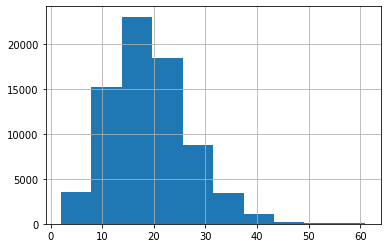

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist

train['search_term'].str.len().hist(bins=10)
plt.show()


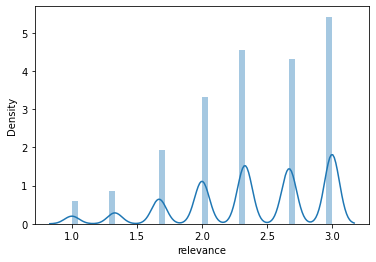

In [18]:
import seaborn as sns

sns.distplot(train['relevance'], kde=True)
plt.show()

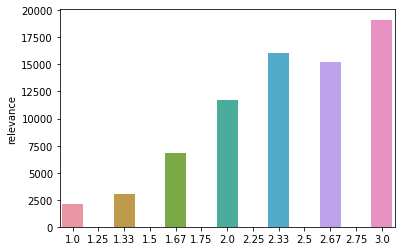

In [19]:
sns.barplot(x=train['relevance'].value_counts().index, y=train['relevance'].value_counts())
plt.show()

## Spellchecker (3 different methods)

import requests
import re
import time
from random import randint

START_SPELL_CHECK="<span class=\"spell\">Showing results for</span>"
END_SPELL_CHECK="<br><span class=\"spell_orig\">Search instead for"

HTML_Codes = (
		("'", '&#39;'),
		('"', '&quot;'),
		('>', '&gt;'),
		('<', '&lt;'),
		('&', '&amp;'),
)

def spell_check(s):
	q = '+'.join(s.split())
	time.sleep(  randint(0,2) ) #relax and don't let google be angry
	r = requests.get("https://www.google.co.uk/search?q="+q)
	content = r.text
	start=content.find(START_SPELL_CHECK) 
	if ( start > -1 ):
		start = start + len(START_SPELL_CHECK)
		end=content.find(END_SPELL_CHECK)
		search= content[start:end]
		search = re.sub(r'<[^>]+>', '', search)
		for code in HTML_Codes:
			search = search.replace(code[1], code[0])
		search = search[1:]
	else:
		search = s
	return search

from spellchecker import SpellChecker
spell = SpellChecker()

def spellchecker(sentence):
    return " ".join([spell.correction(word) for word in sentence.lower().split()])

In [27]:
from tqdm import tqdm
import pkg_resources
from symspellpy import SymSpell, Verbosity

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_bigramdictionary_en_243_342.txt")
# term_index is the column of the term and count_index is the
# column of the term frequency
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

def check_spell(input_term):
    # lookup suggestions for multi-word input strings (supports compound
    # splitting & merging)
    # max edit distance per lookup (per single word, not per whole input string)
    suggestions = sym_spell.lookup_compound(input_term, max_edit_distance=2)
    # display suggestion term, edit distance, and term frequency
    pbar.update()
    return suggestions[0]._term

pbar = tqdm(total=len(train['search_term']))
train['search_term'] = train['search_term'].map(check_spell)
pbar.close()

100%|██████████| 74067/74067 [01:32<00:00, 804.92it/s]


## Stemming - Tokenizing - Removing special characters - Unify units

In [31]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
def str_stem(s): 
    if isinstance(s, str):
        s = re.sub(r"([0-9])( *)\.( *)([0-9])", r"\1.\4", s)
        s = re.sub(r"([0-9]+)( *)(inches|inch|in|')\.?", r"\1in. ", s)
        s = re.sub(r"([0-9]+)( *)(foot|feet|ft|'')\.?", r"\1ft. ", s)
        s = re.sub(r"([0-9]+)( *)(pounds|pound|lbs|lb)\.?", r"\1lb. ", s)
        s = re.sub(r"([0-9]+)( *)(square|sq) ?\.?(feet|foot|ft)\.?", r"\1sq.ft. ", s)
        s = re.sub(r"([0-9]+)( *)(cubic|cu) ?\.?(feet|foot|ft)\.?", r"\1cu.ft. ", s)
        s = re.sub(r"([0-9]+)( *)(gallons|gallon|gal)\.?", r"\1gal. ", s)
        s = re.sub(r"([0-9]+)( *)(ounces|ounce|oz)\.?", r"\1oz. ", s)
        s = re.sub(r"([0-9]+)( *)(centimeters|cm)\.?", r"\1cm. ", s)
        s = re.sub(r"([0-9]+)( *)(milimeters|mm)\.?", r"\1mm. ", s)
        s = re.sub(r"([0-9]+)( *)(°|degrees|degree)\.?", r"\1 deg. ", s)
        s = re.sub(r"([0-9]+)( *)(v|volts|volt)\.?", r"\1 volt. ", s)
        s = re.sub(r"([0-9]+)( *)(wattage|watts|watt)\.?", r"\1 watt. ", s)
        s = re.sub(r"([0-9]+)( *)(amperes|ampere|amps|amp)\.?", r"\1 amp. ", s)
        s = re.sub(r"([0-9]+)( *)(qquart|quart)\.?", r"\1 qt. ", s)
        s = re.sub(r"([0-9]+)( *)(hours|hour|hrs.)\.?", r"\1 hr ", s)
        s = re.sub(r"([0-9]+)( *)(gallons per minute|gallon per minute|gal per minute|gallons/min.|gallons/min)\.?", r"\1 gal. per min. ", s)
        s = re.sub(r"([0-9]+)( *)(gallons per hour|gallon per hour|gal per hour|gallons/hour|gallons/hr)\.?", r"\1 gal. per hr ", s)
        # Deal with special characters
        s = s.replace("$"," ")
        s = s.replace("?"," ")
        s = s.replace("&nbsp;"," ")
        s = s.replace("&amp;","&")
        s = s.replace("&#39;","'")
        s = s.replace("/>/Agt/>","")
        s = s.replace("</a<gt/","")
        s = s.replace("gt/>","")
        s = s.replace("/>","")
        s = s.replace("<br","")
        s = s.replace("<.+?>","")
        s = s.replace("[ &<>)(_,;:!?\+^~@#\$]+"," ")
        s = s.replace("'s\\b","")
        s = s.replace("[']+","")
        s = s.replace("[\"]+","")
        s = s.replace("-"," ")
        s = s.replace("+"," ")
        # Remove text between paranthesis/brackets)
        s = s.replace("[ ]?[[(].+?[])]","")
        # remove sizes
        s = s.replace("size: .+$","")
        s = s.replace("size [0-9]+[.]?[0-9]+\\b","")
        
        
        return " ".join([stemmer.stem(re.sub('[^A-Za-z0-9-./]', ' ', word)) for word in s.lower().split()])
    else:
        return "null"

In [32]:
train['product_title'] = train['product_title'].apply(str_stem)
train['search_term'] = train['search_term'].apply(str_stem)

## Remove stopwords and punctuation (already done in previous step)

In [33]:
import nltk
nltk.download('stopwords', download_dir='./')

[nltk_data] Downloading package stopwords to ./...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
import nltk

nltk.data.path.append("./")
stopwords = stopwords.words('english')
import string

def clean_puntuation_stopwords(text):
  text = ''.join([word for word in text if word not in string.punctuation])
  text = text.lower()
  text = ' '.join([word for word in text.split() if word not in stopwords])
  return text

train['product_title'] = train['product_title'].apply(clean_puntuation_stopwords)
train['search_term'] = train['search_term'].apply(clean_puntuation_stopwords)

In [35]:
train.to_csv('train.csv',index=False)
train.head(10)

,id,product_uid,product_title,search_term,relevance,product_description,MFG Brand Name,Bullet02,Bullet03,Bullet04,Bullet01,Product Width (in.),Bullet05,Product Height (in.),Product Depth (in.),Product Weight (lb.),Bullet06,Color Family,Bullet07,Material,Color/Finish,Bullet08,Certifications and Listings,Bullet09,Assembled Height (in.),Assembled Width (in.),Assembled Depth (in.),Product Length (in.),Bullet10,Indoor/Outdoor,Bullet11
0,2,100001,simpson strong tie 12 gaug angl,angl bracket,3.00,"not only do angles make joints stronger , they...",simpson strong tie,stronger than angled nailing or screw fastenin...,help ensure joints are consistently straight a...,dimensions 3 in. x 3 in. x 1 1/2 in.,versatile connector for various 90 connections...,3,made from 12 gauge steel,3,1.5,0.26,galvanized for extra corrosion resistance,,install with 10d common nails or 9 x 1 1/2 in....,galvanized steel,,,,,,,,,,,
1,3,100001,simpson strong tie 12 gaug angl,bracket,2.50,"not only do angles make joints stronger , they...",simpson strong tie,stronger than angled nailing or screw fastenin...,help ensure joints are consistently straight a...,dimensions 3 in. x 3 in. x 1 1/2 in.,versatile connector for various 90 connections...,3,made from 12 gauge steel,3,1.5,0.26,galvanized for extra corrosion resistance,,install with 10d common nails or 9 x 1 1/2 in....,galvanized steel,,,,,,,,,,,
2,9,100002,behr premium textur deckov 1gal sc 141 tugboat...,deck,3.00,behr premium textured deckover is an innovativ...,behr premium textured deckover,100 acrylic solid color coating,resists cracking and peeling and conceals spli...,"provides a durable , mildew resistant finish","revives wood and composite decks , railings , ...",,covers up to 75 sq. ft. in 2 coats per gallon,,,,"creates a textured , slip resistant finish",browns / tans,"for best results , prepare with the appropriat...",,tugboat,actual paint colors may vary from on screen an...,,,7.76 in,6.63 in,6.63 in,,colors available to be tinted in most stores,,
3,16,100005,delta vero 1 handl shower onli faucet trim kit...,rain shower head,2.33,update your bathroom with the delta vero singl...,delta,includes the handle,maintains a balanced pressure of hot and cold ...,due to watersense regulations in the state of ...,"includes the trim kit only , the rough in kit ...",7.09,,24,15.28,,,chrome,,,chrome,,"ada compliant , csa certified , iapmo certified",,,,,,,,
4,17,100005,delta vero 1 handl shower onli faucet trim kit...,shower onli faucet,2.67,update your bathroom with the delta vero singl...,delta,includes the handle,maintains a balanced pressure of hot and cold ...,due to watersense regulations in the state of ...,"includes the trim kit only , the rough in kit ...",7.09,,24,15.28,,,chrome,,,chrome,,"ada compliant , csa certified , iapmo certified",,,,,,,,
5,18,100006,whirlpool 19 cu ft rang convect microwav stain...,convect,3.00,achieving delicious results is almost effortle...,whirlpool,1100 watts of cooking power and 10 cooking lev...,"400 cfm venting system whisks smoke , steam an...",single piece door with built in touch activate...,spacious 1.9 cu. ft. capacity accommodates din...,29.94,cook with confidence with the sensor and progr...,17.13,18.5,67.1,"kids' menu it 's simple , it 's fast. the kids...",,timesavor plus true convection cooking uses a ...,,stainless steel,industry leading cleanrelease non stick interi...,1 ul listed,recessed turntable 's on/off feature is especi...,17.13 in,29.94 in,18.5 in,,automatic interior incandescent light and larg...,,4 speed fan with auto vent fan function. to ke...
6,20,100006,whirlpool 19 cu ft rang convect microwav stain...,microwav stove,2.67,achieving delicious results is almost effortle...,whirlpool,1100 watts of cooking power and 10 cooking lev...,"400 cfm venting system whisks smoke , steam an...",single piece door with built in touch activate...,spacious 1.9 cu. ft. capacity accommodates din...,29.94,cook with confidence with the sensor and progr...,17.13,18.